In [1]:
nome = 'Mochi'
nome

'Mochi'

In [2]:
idade = 30
idade

30

In [3]:
idade = 38

# Analisando as notas em geral

In [4]:
import pandas as pd
notas = pd.read_csv("data/ratings.csv")

In [5]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
notas.shape

(100836, 4)

In [7]:
notas.columns = ["usuarioID", "filmeID", "nota", "momento"]

In [8]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [10]:
notas['nota'].mean()

3.501556983616962

<AxesSubplot:ylabel='Frequency'>

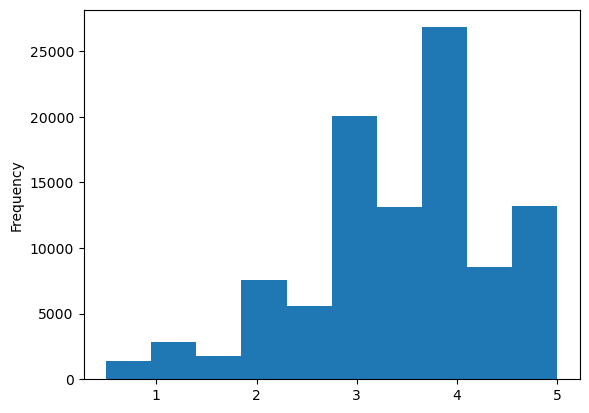

In [11]:
notas.nota.plot(kind = 'hist')

In [12]:
print("Média", notas['nota'].mean())
print("Mediana", notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


In [13]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [14]:
import seaborn as sns

<AxesSubplot:xlabel='nota'>

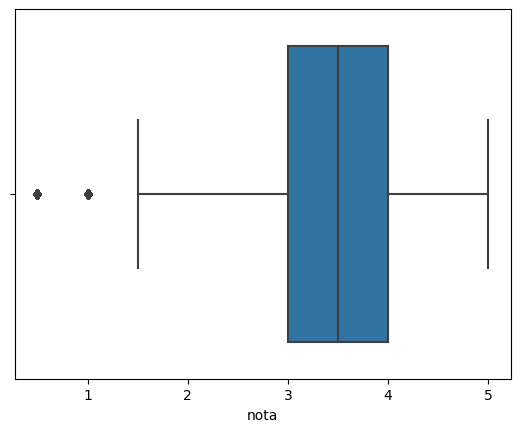

In [15]:
sns.boxplot(x = notas.nota)

# Analisando os Filmes

In [16]:
filmes = pd.read_csv("data/movies.csv")

In [17]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando as notas específicas por filmes

In [18]:
filmes.columns = ["filmeID","Título","Gênero"]

In [19]:
notas.query("filmeID == 1").nota.mean()

3.9209302325581397

In [20]:
notasFilme = notas.groupby("filmeID").mean()["nota"]

In [21]:
notasFilme.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

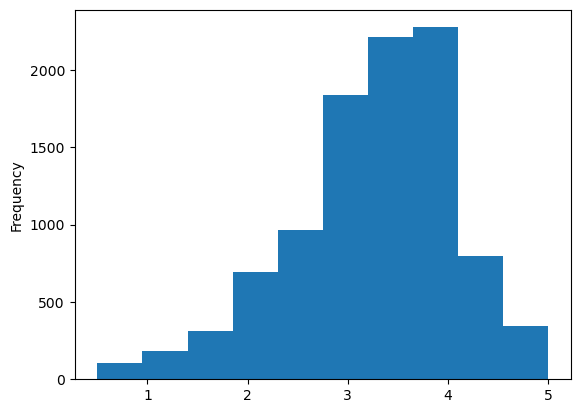

In [23]:
notasFilme.plot(kind = "hist")

<AxesSubplot:xlabel='nota'>

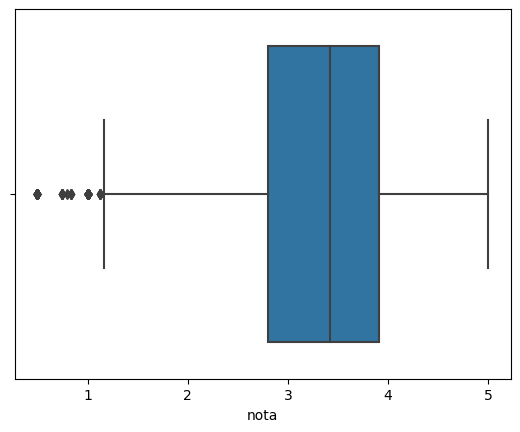

In [25]:
sns.boxplot(x= notasFilme)

In [26]:
notasFilme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64